In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt


path = "/content/drive/MyDrive/Dataset_prediction/dataset_ Sheet.csv"
df = pd.read_csv(path)
dataset = df.to_dict(orient='records')


learning_rate = 0.01
discount_factor = 0.8
num_episodes = 5000

# Neural Network Model
class DQN(nn.Module):
    def __init__(self, num_inputs, num_actions):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, num_actions)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


Q = {}
for data in dataset[1:]:
    slope = data['slope']
    action_speeds = {f'v_inc_{i}': data[f'v_inc_{i}'] for i in range(1, 6)}
    action_speeds.update({f'v_dec_{i}': data[f'v_dec_{i}'] for i in range(1, 6)})
    Q[(slope, data['Distance'])] = action_speeds



dqn = DQN(num_inputs=2, num_actions=10)
optimizer = optim.Adam(dqn.parameters(), lr=learning_rate)

# Training the Q-values
for episode in range(num_episodes):
    for i in range(1, len(dataset) - 1):
        data = dataset[i]
        slope = data['slope']
        Distance = data['Distance']
        state = (slope, Distance)

        state_tensor = torch.tensor([float(slope), float(Distance)], dtype=torch.float)
        q_values = dqn(state_tensor)

        action_speeds = Q[state]
        available_actions = [action for action in action_speeds if action in action_speeds]

        if available_actions:
            action_indices = {action: list(action_speeds.keys()).index(action) for action in available_actions}
            abs_diffs = {action: abs(q_values[action_indices[action]] - data['velocity']) for action in available_actions}

            if abs_diffs:
                selected_action = min(abs_diffs, key=abs_diffs.get)
                selected_velocity = action_speeds[selected_action]
            else:
                continue
        else:
            continue

        next_data = dataset[i + 1]
        next_slope = next_data['slope']
        next_distance = next_data['Distance']
        next_state = (next_slope, next_distance)

        reward = 1.0 / (1.0 + abs(float(data['velocity']) - float(Q[state][selected_action])))

        # Update Q-values
        Q[state][selected_action] = Q[state][selected_action] + learning_rate * (
            reward + discount_factor * max(Q[next_state].values()) - Q[state][selected_action]
        )

        optimizer.zero_grad()
        loss = F.smooth_l1_loss(q_values[action_indices[selected_action]], torch.tensor([reward + discount_factor * max(Q[next_state].values())]))
        loss.backward()
        optimizer.step()


NameError: ignored

In [ ]:
# ... (previous code)

# Calculate Mean Absolute Percentage Error (MAPE) and Accuracy
true_velocities_list = [data['velocity'] for data in dataset[1:]]
predicted_velocities_list = [float(Q[(data['slope'], data['Distance'])][selected_action]) for data, selected_action in zip(dataset[1:], [min(Q[(data['slope'], data['Distance'])], key=Q[(data['slope'], data['Distance'])].get, default=None) for data in dataset[1:]])]

mape = np.mean(np.abs((np.array(true_velocities_list) - np.array(predicted_velocities_list)) / np.array(true_velocities_list))) * 100
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

# Visualization: Velocity vs. Distance
distance_list = [data['Distance'] for data in dataset[1:]]
true_velocities_dict = {data['Distance']: data['velocity'] for data in dataset[1:]}
predicted_velocities_dict = {data['Distance']: float(Q[(data['slope'], data['Distance'])][selected_action]) for data, selected_action in zip(dataset[1:], [min(Q[(data['slope'], data['Distance'])], key=Q[(data['slope'], data['Distance'])].get, default=None) for data in dataset[1:]])}

plt.figure(figsize=(10, 6))
plt.scatter(distance_list, true_velocities_list, label='True Velocities', color='blue')
plt.scatter(distance_list, predicted_velocities_list, label='Predicted Velocities', color='red')
plt.xlabel('Distance')
plt.ylabel('Velocity')
plt.xticks(distance_list)  # Set x-axis ticks to match the distance values in the dataset
plt.legend()
plt.title('True Velocities vs. Predicted Velocities')
plt.show()


NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load and preprocess the dataset
path = "/content/drive/MyDrive/Dataset_prediction/dataset_ Sheet.csv"
df = pd.read_csv(path)
dataset = df.to_dict(orient='records')

# Q-Learning hyperparameters
learning_rate = 0.01
discount_factor = 0.9
num_episodes = 5000

# Neural Network Model
class DQN(nn.Module):
    def __init__(self, num_inputs, num_actions):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, num_actions)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Initialize Q-values
Q = {}
for data in dataset[1:]:
    slope = data['slope']
    action_speeds = {f'v_inc_{i}': data[f'v_inc_{i}'] for i in range(1, 6)}
    action_speeds.update({f'v_dec_{i}': data[f'v_dec_{i}'] for i in range(1, 6)})
    Q[(slope, data['Distance'])] = action_speeds

# Neural Network and Optimizer
dqn = DQN(num_inputs=2, num_actions=10)
optimizer = optim.Adam(dqn.parameters(), lr=learning_rate)

# Training the Q-values using Q-learning
for episode in range(num_episodes):
    for i in range(1, len(dataset) - 1):
        data = dataset[i]
        slope = data['slope']
        Distance = data['Distance']
        state = (slope, Distance)

        state_tensor = torch.tensor([float(slope), float(Distance)], dtype=torch.float)
        q_values = dqn(state_tensor)

        action_speeds = Q[state]
        available_actions = [action for action in action_speeds if action in action_speeds]

        if available_actions:
            action_indices = {action: list(action_speeds.keys()).index(action) for action in available_actions}
            abs_diffs = {action: abs(q_values[action_indices[action]] - data['velocity']) for action in available_actions}

            if abs_diffs:
                selected_action = min(abs_diffs, key=abs_diffs.get)
                selected_velocity = action_speeds[selected_action]
            else:
                continue
        else:
            continue

        next_data = dataset[i + 1]
        next_slope = next_data['slope']
        next_distance = next_data['Distance']
        next_state = (next_slope, next_distance)

        reward = 1.0 / (1.0 + abs(float(data['velocity']) - float(Q[state][selected_action])))

        # Update Q-values using the Q-learning formula
        Q[state][selected_action] = Q[state][selected_action] + learning_rate * (
            reward + discount_factor * max(Q[next_state].values()) - Q[state][selected_action]
        )

        optimizer.zero_grad()
        loss = F.smooth_l1_loss(q_values[action_indices[selected_action]], torch.tensor([reward + discount_factor * max(Q[next_state].values())]))
        loss.backward()
        optimizer.step()



<ipython-input-5-de4a78a6b688>:83: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(q_values[action_indices[selected_action]], torch.tensor([reward + discount_factor * max(Q[next_state].values())]))


Mean Absolute Percentage Error (MAPE): 9.10%
Accuracy: 90.90%


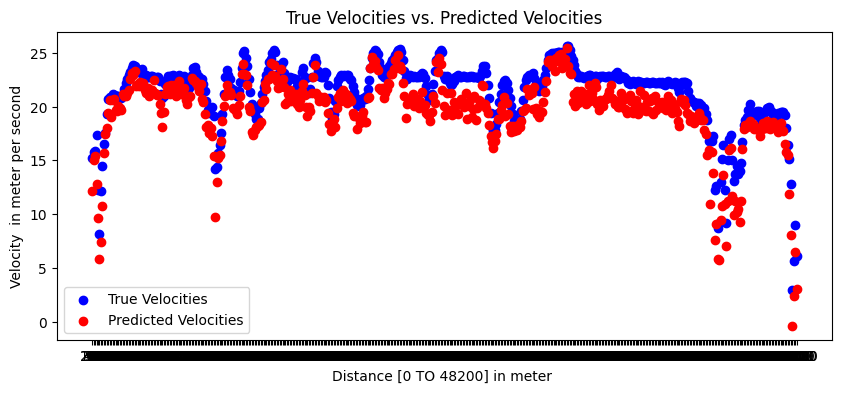

In [ ]:
# ... (previous code)

# Calculate Mean Absolute Percentage Error (MAPE) and Accuracy
true_velocities_list = [data['velocity'] for data in dataset[1:]]
predicted_velocities_list = [float(Q[(data['slope'], data['Distance'])][selected_action]) for data, selected_action in zip(dataset[1:], [min(Q[(data['slope'], data['Distance'])], key=Q[(data['slope'], data['Distance'])].get, default=None) for data in dataset[1:]])]

mape = np.mean(np.abs((np.array(true_velocities_list) - np.array(predicted_velocities_list)) / np.array(true_velocities_list))) * 100
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

# Visualization: Velocity vs. Distance
distance_list = [data['Distance'] for data in dataset[1:]]
true_velocities_dict = {data['Distance']: data['velocity'] for data in dataset[1:]}
predicted_velocities_dict = {data['Distance']: float(Q[(data['slope'], data['Distance'])][selected_action]) for data, selected_action in zip(dataset[1:], [min(Q[(data['slope'], data['Distance'])], key=Q[(data['slope'], data['Distance'])].get, default=None) for data in dataset[1:]])}

plt.figure(figsize=(10, 4))
plt.scatter(distance_list, true_velocities_list, label='True Velocities', color='blue')
plt.scatter(distance_list, predicted_velocities_list, label='Predicted Velocities', color='red')
plt.xlabel('Distance [0 TO 48200] in meter ')
plt.ylabel('Velocity  in meter per second')
plt.xticks(distance_list)  # Set x-axis ticks to match the distance values in the dataset
plt.legend()
plt.title('True Velocities vs. Predicted Velocities')
plt.show()
